# Assignment: Visualization-quantities: Lines, Scatters and Bars

## Instructions

#### In this lesson, you worked with line charts, scatterplots, and bar charts to show interesting facts about this dataset. In this assignment, dig deeper into the dataset to discover a fact about a given type of bird. For example, create a notebook visualizing all the interesting data you can uncover about Snow Geese. Use the three plots mentioned above to tell a story in your notebook.

### Import necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset:

In [2]:
birds = pd.read_csv('birds.csv')

print(birds.info())
print(birds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                443 non-null    object 
 1   ScientificName      443 non-null    object 
 2   Category            443 non-null    object 
 3   Order               443 non-null    object 
 4   Family              443 non-null    object 
 5   Genus               443 non-null    object 
 6   ConservationStatus  443 non-null    object 
 7   MinLength           443 non-null    float64
 8   MaxLength           443 non-null    float64
 9   MinBodyMass         443 non-null    float64
 10  MaxBodyMass         443 non-null    float64
 11  MinWingspan         443 non-null    float64
 12  MaxWingspan         443 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.1+ KB
None
                           Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygn

## Line chart: Max Body Mass of birds

<Axes: title={'center': 'Max Body Mass'}, xlabel='Birds', ylabel='Body mass (g)'>

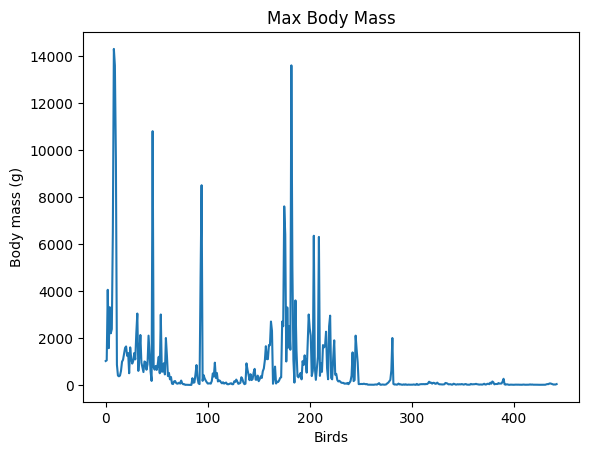

In [3]:
plt.title('Max Body Mass')
plt.ylabel('Body mass (g)')
plt.xlabel('Birds')
bodymass = birds.MaxBodyMass
bodymass.plot()


## Bar Chart: Average Max Body Mass of Birds by Category

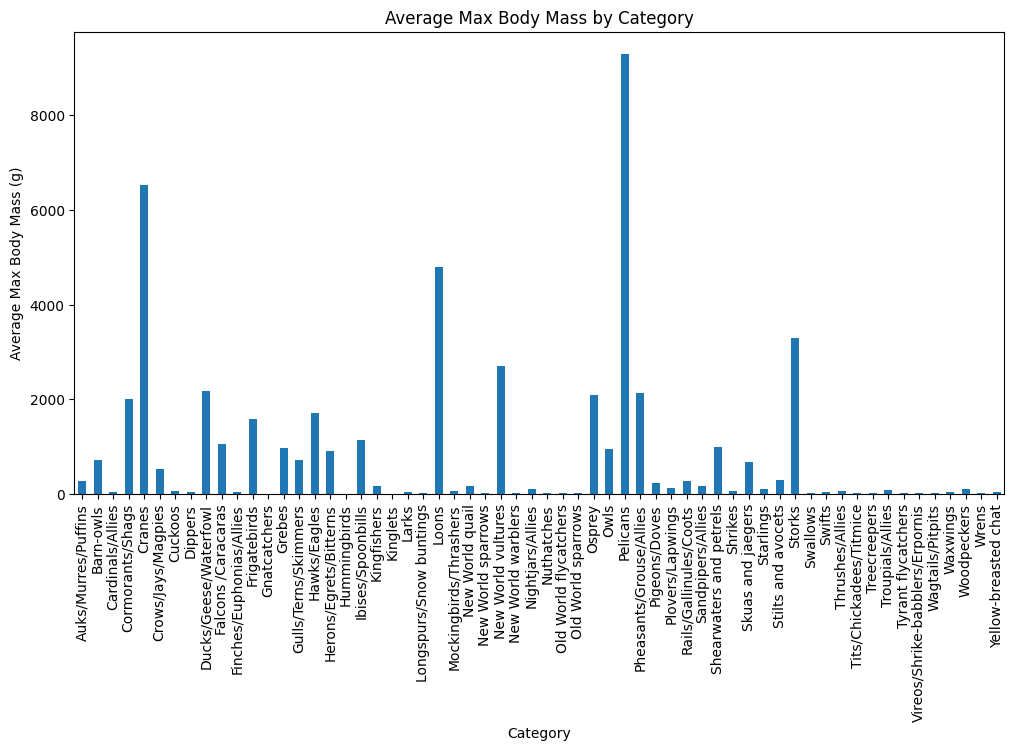

In [4]:
plt.figure(figsize=(12, 6))
birds.groupby('Category')['MaxBodyMass'].mean().plot(kind='bar')
plt.title('Average Max Body Mass by Category')
plt.xlabel('Category')
plt.ylabel('Average Max Body Mass (g)')
plt.show()

## Line chart: Relationship between Minimum and Maximum body mass

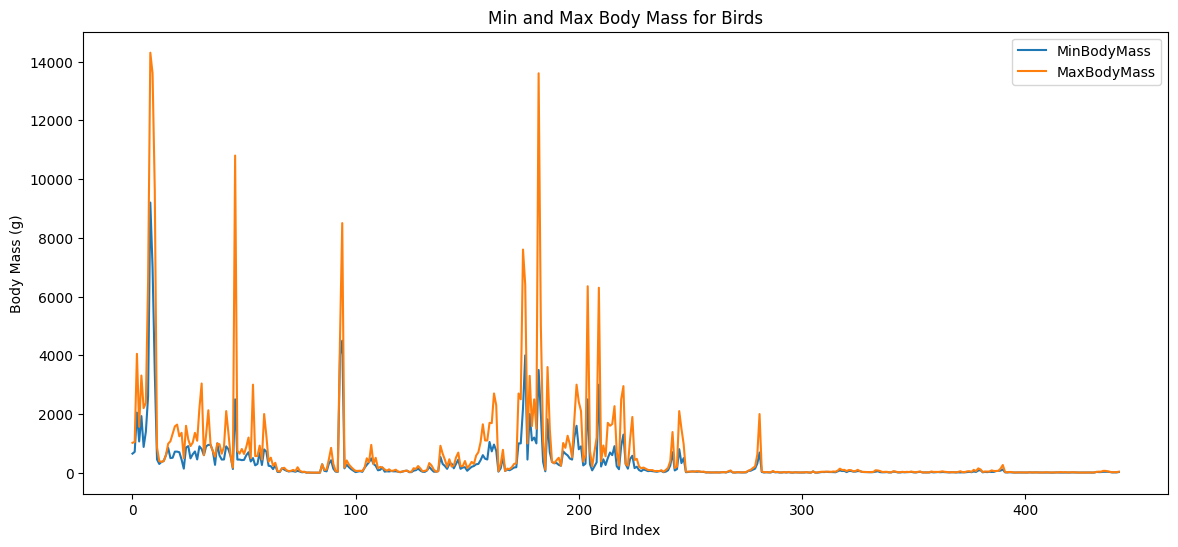

In [5]:
birds[['MinBodyMass', 'MaxBodyMass']].plot(kind='line', figsize=(14, 6))
plt.title('Min and Max Body Mass for Birds')
plt.xlabel('Bird Index')
plt.ylabel('Body Mass (g)')
plt.show()

## Scatter plot: Relationship between Wingspan and Body Mass

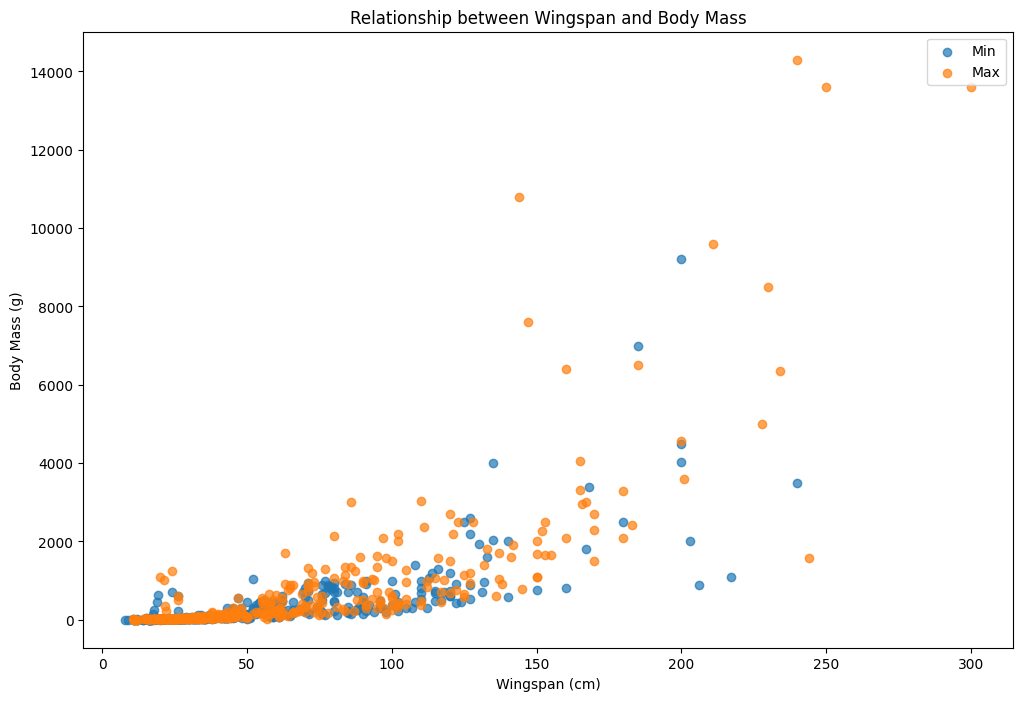

In [6]:
# Filter out wingspans above 500
filtered_birds = birds[birds['MaxWingspan'] <= 500]

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_birds['MinWingspan'], filtered_birds['MinBodyMass'], label='Min', alpha=0.7)
plt.scatter(filtered_birds['MaxWingspan'], filtered_birds['MaxBodyMass'], label='Max', alpha=0.7)
plt.title('Relationship between Wingspan and Body Mass')
plt.xlabel('Wingspan (cm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

## Scatter plot: Relationship between Wingspan and Body Mass of birds with Snow Goose Distinguished

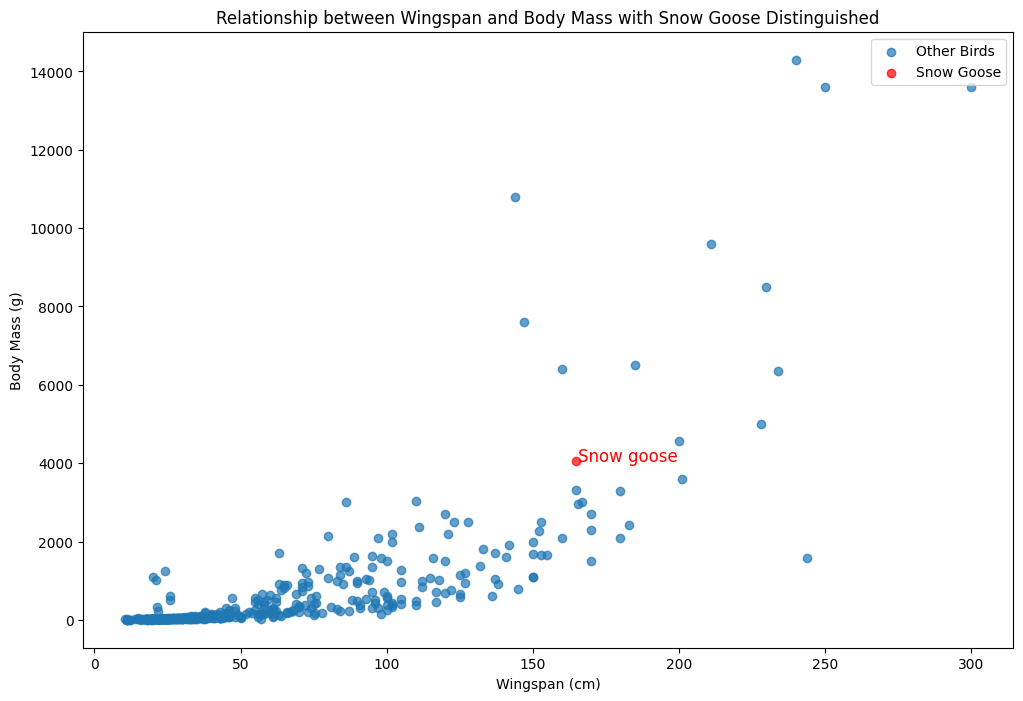

In [7]:
snow_goose = filtered_birds[filtered_birds['Name'] == 'Snow goose']
other_birds = filtered_birds[filtered_birds['Name'] != 'Snow goose']


plt.figure(figsize=(12, 8))
plt.scatter(other_birds['MaxWingspan'], other_birds['MaxBodyMass'], label='Other Birds', alpha=0.7)
plt.scatter(snow_goose['MaxWingspan'], snow_goose['MaxBodyMass'], label='Snow Goose', color='red', alpha=0.7, marker= 'o')

# Add labels for snow_goos
for i, name in enumerate(snow_goose['Name']):
    plt.text(snow_goose['MaxWingspan'].iloc[i] + 0.5, snow_goose['MaxBodyMass'].iloc[i], name, color='red', fontsize=12)


plt.title('Relationship between Wingspan and Body Mass with Snow Goose Distinguished')
plt.xlabel('Wingspan (cm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

## Create a bar chart for the average Max Body Mass distinguishing the Category Snow goose belong with red bar

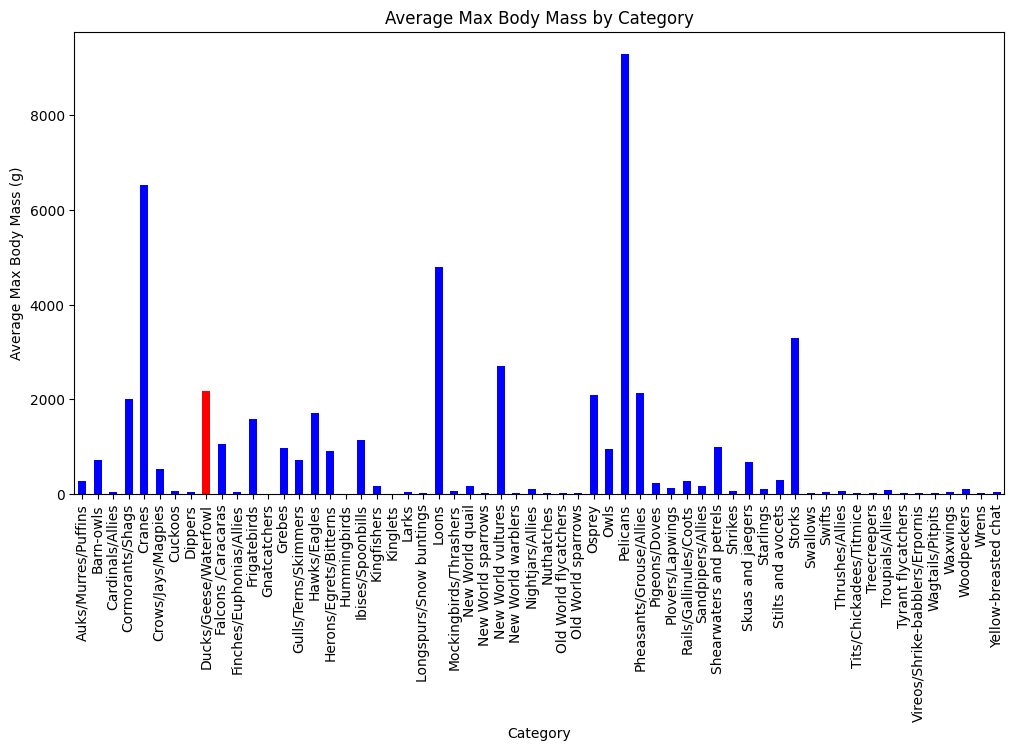

In [8]:
snow_goose_category = birds.loc[birds['Name'] == 'Snow goose', 'Category'].values[0]

plt.figure(figsize=(12, 6))
average_max_body_mass = birds.groupby('Category')['MaxBodyMass'].mean()
average_max_body_mass.plot(kind='bar', color=['blue' if cat != snow_goose_category else 'red' for cat in average_max_body_mass.index])

plt.title('Average Max Body Mass by Category')
plt.xlabel('Category')
plt.ylabel('Average Max Body Mass (g)')
plt.show()

##  Bar chart showing body mass of birds in the Docks/Geese/Waterfowl Category

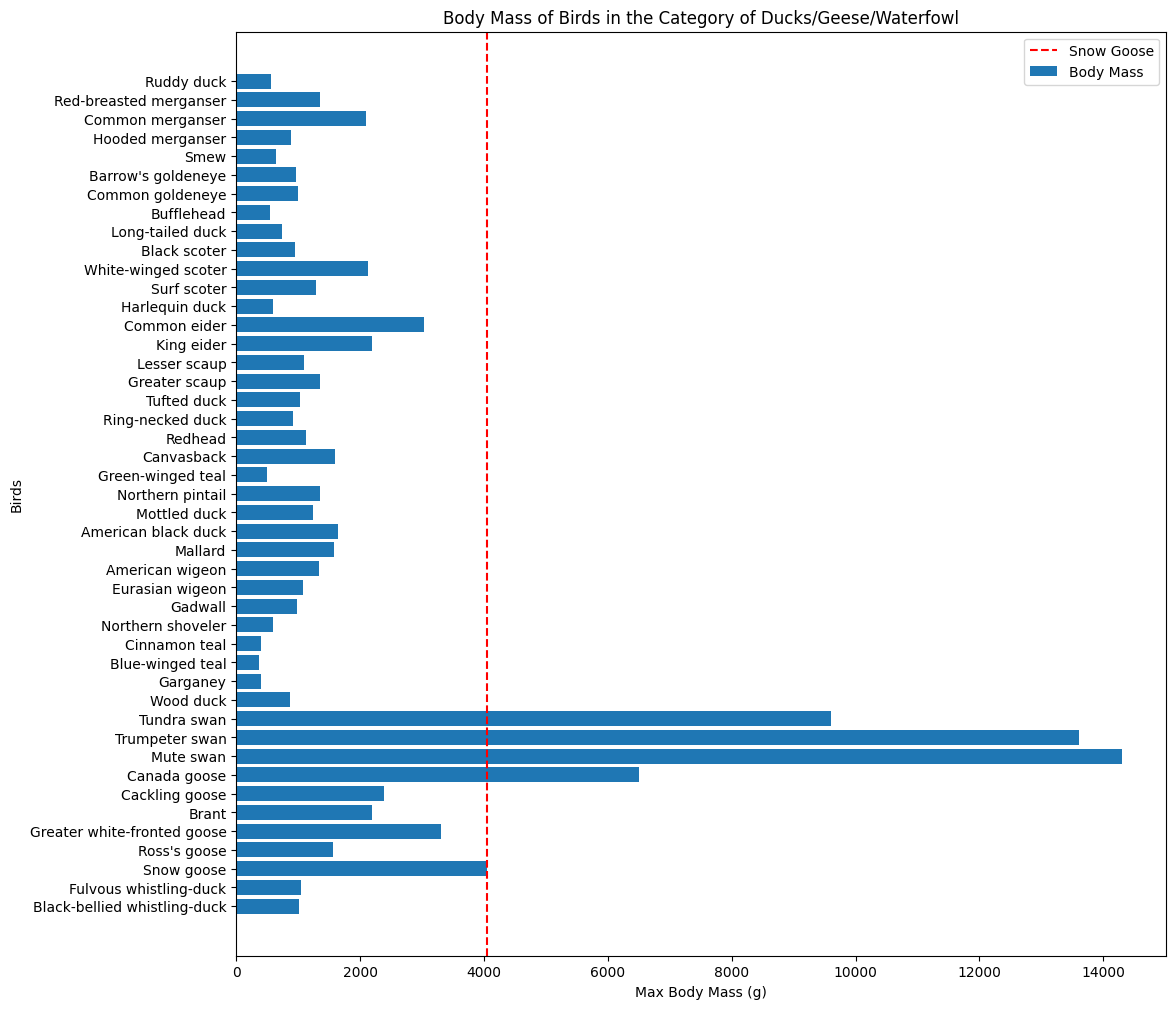

In [9]:
snow_goose = filtered_birds[filtered_birds['Name'] == 'Snow goose']
other_birds_same_category = filtered_birds[filtered_birds['Category'] == snow_goose.iloc[0]['Category']]


plt.figure(figsize=(12, 12))
plt.barh(other_birds_same_category['Name'], other_birds_same_category['MaxBodyMass'], label='Body Mass')
plt.axvline(x=snow_goose.iloc[0]['MaxBodyMass'], color='red', linestyle='--', label='Snow Goose')

plt.title(f'Body Mass of Birds in the Category of {snow_goose.iloc[0]["Category"]}')
plt.xlabel('Max Body Mass (g)')
plt.ylabel('Birds')
plt.legend()
plt.show()